<a href="https://colab.research.google.com/github/milioe/CursoAnalitica/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arizona Houses


* Fuente: [Kaggle](https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021)

# Business Understanding

El presente problema tiene la finalidad de 

# Data Understanding

In [ ]:
!wget https://raw.githubusercontent.com/milioe/CursoAnalitica/main/Datasets/Real%20estate%20valuation%20data%20set.csv

--2022-05-10 17:20:12--  https://raw.githubusercontent.com/milioe/CursoAnalitica/main/Datasets/Real%20estate%20valuation%20data%20set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21966 (21K) [text/plain]
Saving to: ‘Real estate valuation data set.csv’

Real estate valuati 100%[===================>]  21.45K  --.-KB/s    in 0s      

2022-05-10 17:20:12 (71.3 MB/s) - ‘Real estate valuation data set.csv’ saved [21966/21966]



In [ ]:
# Improtamos pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
# Asignamos el .csv al objeto df (DataFrame)
df = pd.read_csv("Real estate valuation data set.csv")

In [ ]:
# Dataset
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Información de valores nulos, y tipo de columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       563 non-null    int64  
 1   address     563 non-null    object 
 2   Local_area  563 non-null    object 
 3   zipcode     563 non-null    object 
 4   beds        563 non-null    float64
 5   baths       563 non-null    float64
 6   sqft        563 non-null    float64
 7   url         563 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 35.3+ KB


In [22]:
# Descripción estadística básica de cada variable
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


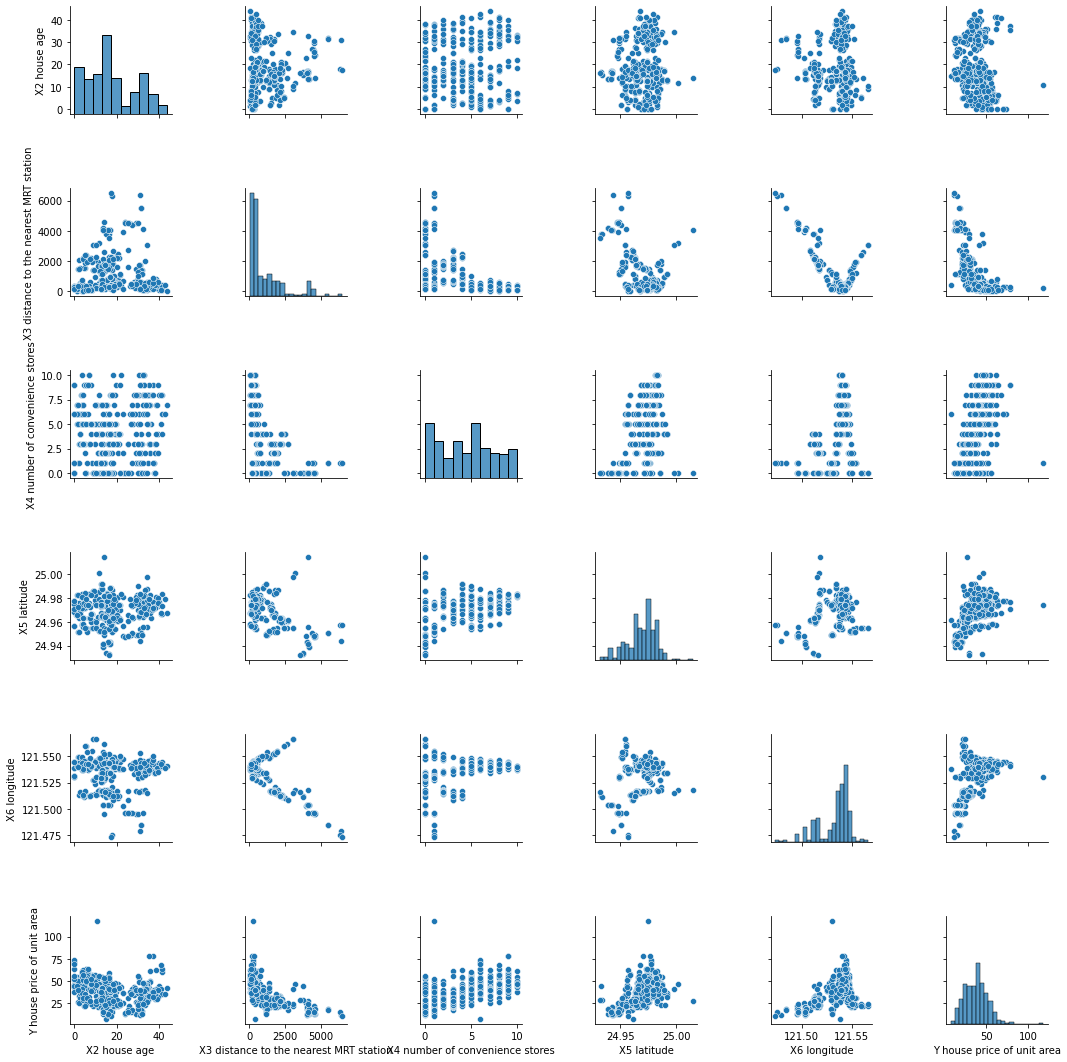

In [ ]:
# Seleccionamos todas las filas, desde la segunda variable (house age), hasta la ultima
sns.pairplot(df.iloc[:,2:])

In [26]:
# Imprimimos un scatter sencillo (Dos dimensiones)
import plotly.express as px

scat = px.scatter(x=df["X2 house age"], y=df["Y house price of unit area"], title="Scatter: House age vs Price")
scat.show();

In [23]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Data Preparation

Para la mayoría de modelos, 

In [28]:
# Normalización 
from sklearn import preprocessing 
df_norm=preprocessing.normalize(df.iloc[:,2:]) 
df_norm=pd.DataFrame(df_norm)

In [29]:
# Ponemos el nombre de las variables 
df_norm.columns=df.iloc[:,2:].columns

In [30]:
# No necesitamos normalizar y, la variable que queremos predecir
df_norm['Y house price of unit area'] = df['Y house price of unit area']
df_norm

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,37.9
1,0.058362,0.917610,0.026936,0.074764,0.363757,42.2
2,0.023025,0.972905,0.008656,0.043258,0.210416,47.3
3,0.022999,0.971790,0.008646,0.043209,0.210175,54.8
4,0.012132,0.947692,0.012132,0.060611,0.294916,43.1
...,...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752,15.4
410,0.034603,0.558934,0.055612,0.154318,0.751023,50.0
411,0.045556,0.947394,0.016962,0.060529,0.294514,40.6
412,0.047379,0.613066,0.029247,0.146038,0.710928,52.5


In [31]:
# Tomamos todas las variables independientes (es decir, quitamos la variable y)
X = df_norm.iloc[:,:5]
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.201737,0.535100,0.063043,0.157500,0.766225
1,0.058362,0.917610,0.026936,0.074764,0.363757
2,0.023025,0.972905,0.008656,0.043258,0.210416
3,0.022999,0.971790,0.008646,0.043209,0.210175
4,0.012132,0.947692,0.012132,0.060611,0.294916
...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752
410,0.034603,0.558934,0.055612,0.154318,0.751023
411,0.045556,0.947394,0.016962,0.060529,0.294514
412,0.047379,0.613066,0.029247,0.146038,0.710928


In [33]:
# Tomamos únicamente la variable y
y = df_norm.iloc[:,5:6]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


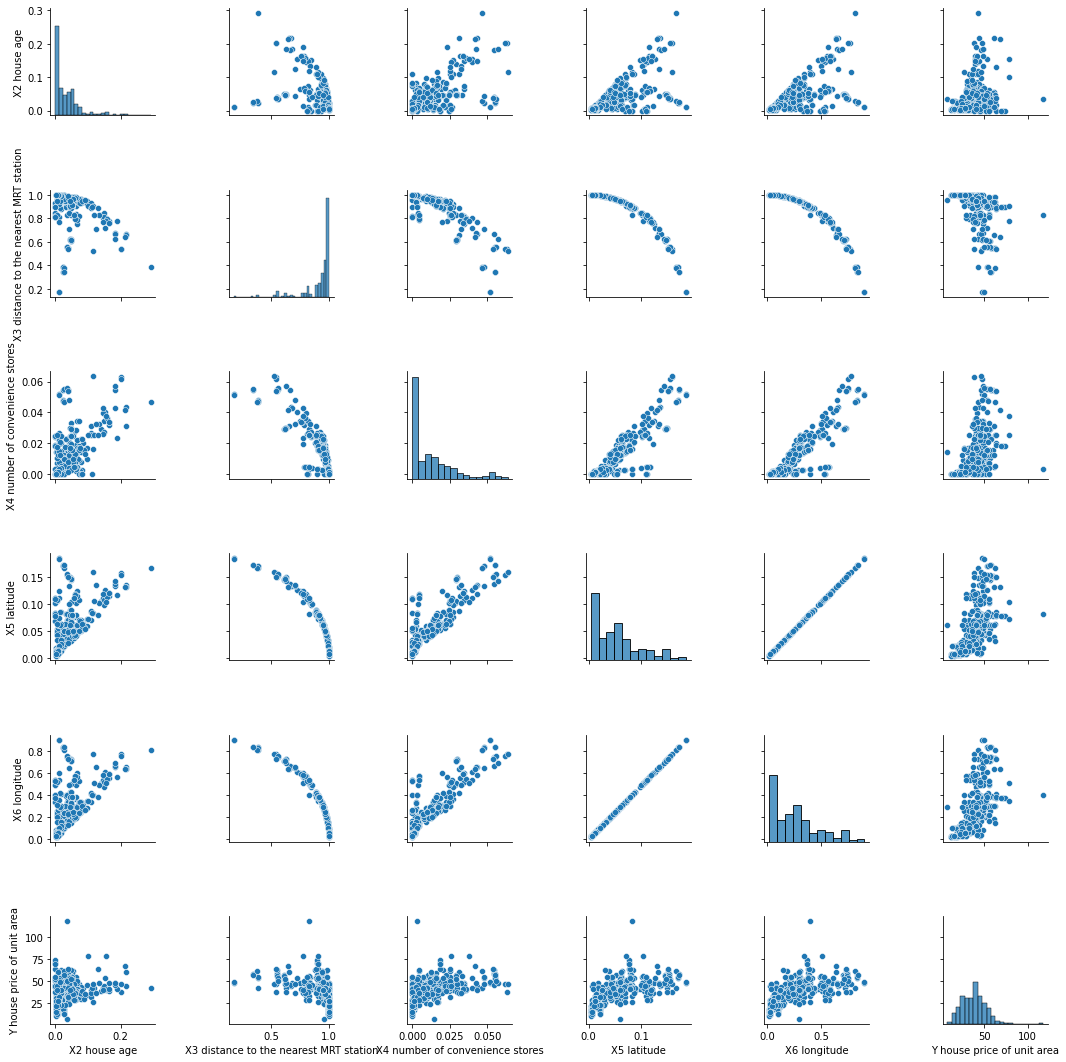

In [34]:
sns.pairplot(df_norm)

In [37]:
cor = df_norm.corr()
cor = px.imshow(cor)
cor.show()

In [38]:
# Train-test split
from sklearn import model_selection

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,test_size =0.2,random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 5)
(83, 5)
(331, 1)
(83, 1)


# Algorithm Selection

In [40]:
from sklearn import linear_model 

lm=linear_model.LinearRegression(fit_intercept=True)
#Trains the linear regression algorithm on the training dataset
model=lm.fit(x_train,y_train)

In [41]:
# Valor de intercepto
model.intercept_

array([-34.91939464])

In [42]:
# Coeficientes
coeff_df = pd.DataFrame(model.coef_.T, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
X2 house age,-86.382891
X3 distance to the nearest MRT station,58.368546
X4 number of convenience stores,200.712176
X5 latitude,104529.407984
X6 longitude,-21403.405846


\begin{equation}
y = -34.92 - 86.39 X_1 + 58.37 X_2 + 200.71 X_3 + 104529 X_4 - 214013.40 X_5
\end{equation}

Por cada año adicional, en el precio se espera que el precio disminuya en $86.39

# Evaluation

In [46]:
from statsmodels import regression 
import statsmodels.api as sm 
import numpy as np

def linreg(X,Y):
  # Running the linear regression
  X = sm.add_constant(X)
  model = regression.linear_model.OLS(Y, X).fit() 
  a = model.params[0]
  b = model.params[1]
  X = X[:, 1]
  return model.summary()

In [51]:
linreg(x_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     74.73
Date:                Tue, 10 May 2022   Prob (F-statistic):           6.07e-52
Time:                        19:15:17   Log-Likelihood:                -1212.0
No. Observations:                 331   AIC:                             2436.
Df Residuals:                     325   BIC:                             2459.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.9194     10.999     -3.175      0.002     -56.558     -13.280
x1           -86.3829     15.386     -5.614      0.000    -116.652     -56.113
x2            58.3685     10.411      5.606      0.000      37.887      78.850
x3           200.7122     82.604      2.430      0.016      38.207     363.218
x4          1.045e+05   2.62e+04      3.993      0.000     5.3e+04    1.56e+05
x5          -2.14e+04   5379.895     -3.978      0.000    -3.2e+04   -1.08e+04
==============================================================================
Omnibus:                      186.472   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2673.807
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      16.338   Cond. No.                     7.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""